In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# import mr_forecast as mr
%matplotlib inline

14.869661199174608 1.4116829558976747 1.4217507963804152
8.880161668147078e+25
8.430570612620925e+24
8.49069575598382e+24


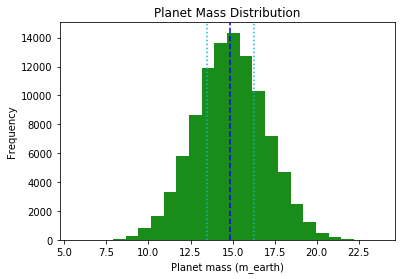

In [5]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##
##          Estimate mass distribution            ##
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##

# Wolfgang and Rogers, since Kipping mass relation is weird

# M/M⊕ = 2.7(R/R⊕)^1.3
# scatter in mass of 1.9M⊕
# centered @ (some number from andy) +-(some sigma)

## define constants and conversion factors
G = 6.673*(10**(-11))
au2meters = 149597870691.00
jrad = 66854000
erad = 6371000.
emass = 5.972*10**24.
sunrad = 695700000. #m
sunmass = 1.98847*10**30. #kg

mstar = 0.294*1.989*(10**30)
rstar = 0.295*6.957*(10**8)
rcen = 0.1153068176418217*rstar/erad #mean radius of planet in earth radii
a = 21.8*rstar #meters
Q_p = 10**4
Q_s = 10**15 ## what is this value actually
# Qp is a dimensionless parameter
# related to the rate of energy dissipated per orbital period
# by tidal forced oscillations (Barker & Ogilvie 2009). The
# smaller Qp, the more efficient the tidal dissipation is.

# Determining Q:
# http://adsabs.harvard.edu/abs/2018ApJ...863..166V
# http://adsabs.harvard.edu/abs/2008Icar..193..267Z
# http://adsabs.harvard.edu/abs/2014IAUS..293..362R
# http://iopscience.iop.org/article/10.1088/0004-637X/725/2/1995/meta#apj372139r66
# http://iopscience.iop.org/article/10.1088/0004-637X/800/2/135/meta


## create radius distribution from data, calculate likely mass distribution
radii = np.random.normal(loc=rcen, scale=(0.0053*rstar/erad), size = 100000) 
ms = 2.7*(radii)**1.3

## create gaussian distribution centered at mass calculated for radius distribution
masses = np.random.normal(loc=ms, scale=1.9)
mplanet = [np.percentile(masses, 50), np.percentile(masses, 25), np.percentile(masses, 75)]

print mplanet[0], mplanet[0]-mplanet[1], mplanet[2]-mplanet[0]

## plot things
plt.hist(masses, bins=np.linspace(min(masses), max(masses), num=25), color='g', alpha=.9)
plt.axvline(mplanet[0], color='b', zorder=10, linestyle='--')
plt.axvline(mplanet[1], color='c', zorder=10, linestyle=':')
plt.axvline(mplanet[2], color='c', zorder=10, linestyle=':')
plt.xlabel('Planet mass (m_earth)')
plt.ylabel('Frequency')
plt.title('Planet Mass Distribution')
plt.savefig('mass_dist.png')

## convert values back into SI from earth units
rcen = rcen*erad
masses = masses*emass
mplanet = [np.percentile(masses, 50), np.percentile(masses, 25), np.percentile(masses, 75)]

# print mplanet[0]
# print mplanet[0]-mplanet[1]
# print mplanet[2]-mplanet[0]

In [8]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##
##      Calculate circularization timescale       ##
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##
# https://arxiv.org/pdf/1208.0237.pdf   EQUATION 2
# http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.890.4049&rep=rep1&type=pdf   EQUATION 25

# masses = mass distribution
# mplanet = percentiles of mass distribution
# ms = masses directly calculated from radii distribution


#~~~calculate timescale~~~
timescale = []
for mp in masses:
    tcirc = ( (4./63.) * (Q_p*mp/(rcen**5.) * (1./np.sqrt(G*mstar**3.))) + (16./225.)*(1/np.sqrt(G*mstar))*(Q_s/(rstar**5*mp)))*a**(13./2.)
    tcirc = tcirc/(86400.*365.*(10.**6.)) #convert from seconds to Myr
    timescale.append(tcirc)
# print 'main timescale:  ', timescale[:5]

tc = [np.percentile(timescale, 50), np.percentile(timescale, 50)-np.percentile(timescale, 25), np.percentile(timescale, 75)-np.percentile(timescale, 50)]
print tc

[35.399145029059994, 3.3562122753705523, 3.336166683912694]


In [17]:
#~~~~DEBUGGING~~~
print '\n Part one: '
print 4./63.
print (Q_p*mp)/(rcen**5.)
print 1./np.sqrt(G*mstar**3.)
print a**(13./2.)

print '\n Part two: '
print 16./225.
print 1/np.sqrt(G*mstar)
print Q_s/(rstar**5*mp)



 Part one: 
0.0634920634921
1.0474135563727445e-07
2.7375765198093222e-40
5.36479750506e+62

 Part two: 
0.0711111111111
1.600841671182818e-10
3.533187498809604e-53


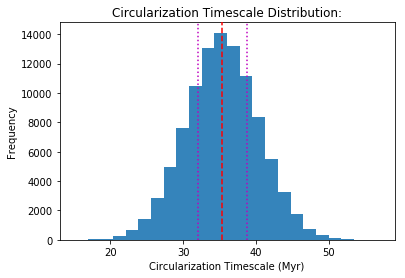

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(np.array(timescale).flatten(), bins=np.linspace(np.min(timescale), np.max(timescale), num=25), alpha=.9)
ax.axvline(tc[0], color='r', zorder=10, linestyle='--') #tcmean
ax.axvline(tc[1], color='m', zorder=10, linestyle=':') #tclower
ax.axvline(tc[2], color='m', zorder=10, linestyle=':') #tcupper


## Comment in following to get transparent background & white axes and labels

#plt.xlim(0,300)
# ax.set_facecolor('None')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.title.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')


plt.xlabel('Circularization Timescale (Myr)')
plt.ylabel('Frequency')
plt.title('Circularization Timescale Distribution:')
plt.savefig('circtime_dist.png', transparent=True)

In [20]:
##~~~~~~~~~~~~KEPLER 93b TEST ~~~~~~~~~~##
au2meters = 149597870691.00
erad = 6371000.
emass = 5.972*10**24.
sunrad = 695700000. #m
sunmass = 1.98847*10**30. #kg

rstar = 0.919*sunrad
mstar = 0.91*sunmass
rcen = 1.48*erad
mp = 4.02*emass
a = 0.053*au2meters
Q_p = 100.
Q_s = 10**7.

# The expected circularization timescale for Kepler-93b is significantly shorter than 
# the 6.6 ± 0.9 Gyr age of the star (Ballard et al. 2014). Following Goldreich & Soter 
# (1966), we calculated a tidal circularization timescale of 75 Myr for a 4.02 M⊕, 
# 1.48 R⊕ planet in an orbit with a = 0.053 AU around a 0.91 M☉ star. We assumed 
# Q = 100 based on the tidal quality factors estimated for terrestrial planets in the 
# Solar System (Yoder 1995; Henning et al. 2009). 
# -- http://iopscience.iop.org/article/10.1088/0004-637X/800/2/135/meta
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##

Kepler93b_timescale = ( (4./63.) * (Q_p*mp/(rcen**5.) * (1./np.sqrt(G*mstar**3.))) + (16./225.)*(1/np.sqrt(G*mstar))*(Q_s/(rstar**5*mp)))*a**(13./2.)
Kepler93b_timescale = Kepler93b_timescale/(86400.*365.*(10.**6.)) #sec to Myr

print Kepler93b_timescale


72.14715324578889
